<a href="https://colab.research.google.com/github/mmovahed/Spectral_Methods/blob/main/PDE/Subdomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subdomain weighted residual method

The one-dimensional heat equation:

$ \frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} $

Domain: $( x \in [0, L])$ and $(t \geq 0)$

Boundary conditions: $( u(0, t) = u(L, t) = 0 )$

Initial condition: $( u(x, 0) = \sin(\pi x) )$.


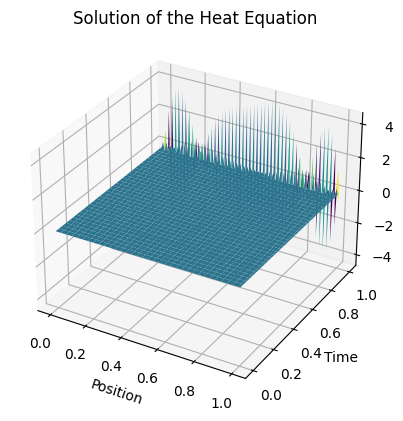

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Length of the domain
T = 1.0  # Total time
N = 100  # Number of grid points
M = 100  # Number of time steps
k = T / M  # Time step size
h = L / N  # Grid spacing
alpha = 1.0  # Thermal diffusivity

# Define initial condition
def initial_condition(x):
    return np.sin(np.pi * x)

# Define boundary conditions
def boundary_conditions(t):
    return 0.0

# Initialize solution matrix
u = np.zeros((N+1, M+1))

# Initialize grid
x = np.linspace(0, L, N+1)
t = np.linspace(0, T, M+1)

# Set initial condition
u[:, 0] = initial_condition(x)

# Define spectral method functions
def D_matrix(N, h):
    D = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(N+1):
            if i != j:
                D[i, j] = (-1) ** (i + j) / (2 * h * np.sin(np.pi * (i - j) / (2 * N)))
    return D

def A_matrix(N, h):
    A = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(N+1):
            if i == j:
                A[i, j] = (np.pi ** 2 * i ** 2) / (3 * N ** 2) - 1 / (6 * h ** 2)
            else:
                A[i, j] = 2 * ((-1) ** (i + j)) / ((np.pi * (i - j)) ** 2)
    return A

# Compute solution using subdomain method
D = D_matrix(N, h)
A = A_matrix(N, h)

for m in range(1, M+1):
    b = u[:, m-1].copy()
    b[0] = b[0] + alpha * boundary_conditions(t[m])
    b[N] = b[N] + alpha * boundary_conditions(t[m])
    u[:, m] = np.linalg.solve(A, np.dot(D, b))

# Plot the solution
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u.T, cmap='viridis')
ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Temperature')
plt.title('Solution of the Heat Equation')
plt.show()